In [296]:
import numpy as np
import numpy.linalg
import scipy as sc
from scipy.optimize import minimize_scalar, minimize
from scipy.misc import derivative
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,10)
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, HTML
import time
%matplotlib notebook
#%matplotlib inline
#%load_ext tikzmagic
import tikzmagic
#https://github.com/mkrphys/ipython-tikzmagic
#http://blog.invibe.net/posts/2015-01-20-using-tikzmagic.html
#https://stackoverflow.com/questions/45671481/how-do-i-center-the-outputs-on-a-python-jupyter-notebook
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
#print(sc.__version__)
#print(numpy.__version__)

# <center>CMT Seminar</center>
## <center>Variational Principle in Meanfield Theories by the Example of the Ising Model</center>

## The Ising Model

\begin{equation}
\hat{H} = - \sum_{\left<ij\right>} J_{ij} \sigma^{z}_{i}\sigma^{z}_{j} - h^{z}\sum_{i=1}^{N}\sigma^{z}_{i} 
\end{equation}

### The Antiferromagnetic Case

\begin{equation}
\hat{H} = \sum_{\left<ij\right>} J \hat{\sigma}^{z}_{i}\hat{\sigma}^{z}_{j} 
\end{equation}

Following $J=1$ and $k_B = 1$

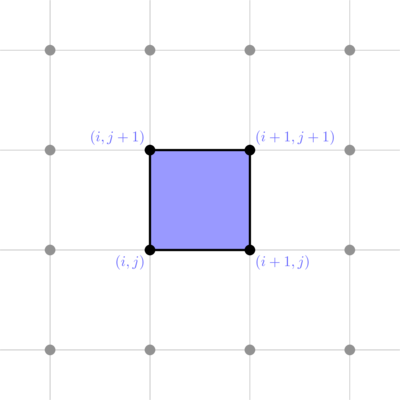

In [3]:
%%tikz -s 400,400 -sc 1.2 -f png
\tikzset{every node/.style={font=\sffamily}, >=stealth, scale=1.0};
\draw [style=help lines, step=2]				(-1,-1)	grid		(+7,+7);
\draw [line width=0.5mm, fill=blue!40!white]	(+2,+2)	rectangle	(+4,+4);
 
\filldraw [color=gray]	(0,0) circle (.1);
\filldraw [color=gray]	(0,2) circle (.1);
\filldraw [color=gray]	(0,4) circle (.1);
\filldraw [color=gray]	(0,6) circle (.1);
\filldraw [color=gray]	(2,0) circle (.1);
\filldraw [color=black]	(2,2) circle (.1);
\filldraw [color=black]	(2,4) circle (.1);
\filldraw [color=gray]	(2,6) circle (.1);
\filldraw [color=gray]	(4,0) circle (.1);
\filldraw [color=black]	(4,2) circle (.1);
\filldraw [color=black]	(4,4) circle (.1);
\filldraw [color=gray]	(4,6) circle (.1);
\filldraw [color=gray]	(6,0) circle (.1);
\filldraw [color=gray]	(6,2) circle (.1);
\filldraw [color=gray]	(6,4) circle (.1);
\filldraw [color=gray]	(6,6) circle (.1);

\draw [blue!60!white] (  2,  2) node[anchor=north east] {$(i  ,j  )$};
\draw [blue!60!white] (  4,  2) node[anchor=north west] {$(i+1,j  )$};
\draw [blue!60!white] (  4,  4) node[anchor=south west] {$(i+1,j+1)$};
\draw [blue!60!white] (  2,  4) node[anchor=south east] {$(i  ,j+1)$};

## Mean Field Decoupling

## Self-Consistency (Direct Iteration) Procedure

### Self-Consistency Equations

\begin{equation}
m_a = \left< \hat{\sigma}^{z}_{i\in a}\right> = - \tanh{\left(\frac{4 m_b}{T}\right)}
\end{equation}

In [169]:
def ma_SCE(m_b, T):
    return( - np.tanh(m_b*4.0/T))

\begin{equation}
m_b = \left< \hat{\sigma}^{z}_{i\in b}\right> = - \tanh{\left(\frac{4 m_a}{T}\right)}
\end{equation}

In [170]:
def mb_SCE(m_a, T):
    return( - np.tanh(m_a*4.0/T))

### Direct Iteration 

<IPython.core.display.Javascript object>


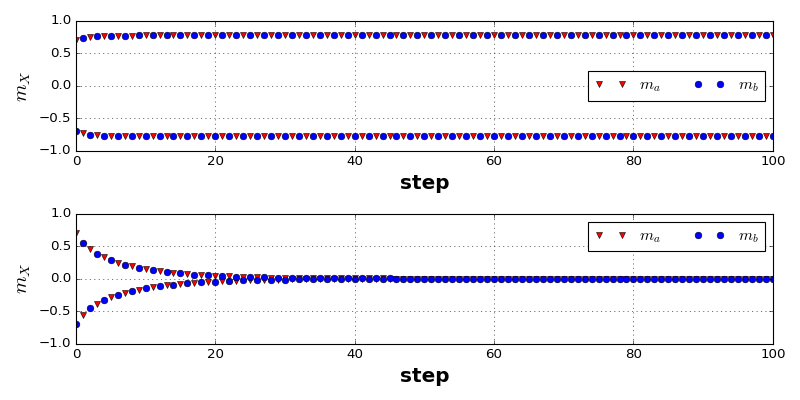

In [270]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(2,1,1)

m_a_guess = 0.7
m_b_guess = -0.7

iter_max = 100
iter_ctr = 0

conv_boolflag = False

T = 3.0
iter_loopdata = np.zeros((1,3))

m_a = m_a_guess
m_b = m_b_guess

iter_loopdata[0][0] = 0.0
iter_loopdata[0][1] = m_a
iter_loopdata[0][2] = m_b

while iter_ctr < iter_max and not conv_boolflag:
    iter_ctr = iter_ctr + 1
        
    m_b = ma_SCE(m_b,T)
    m_a = mb_SCE(m_a,T)
        
#    print("Loop[{0:3.3f}]:, m_a: {1:3.3f}, m_b: {2:3.3f}\n".format(iter_ctr, m_a, m_b))

    temp = np.concatenate(([m_a],[m_b]), axis=0)
    temp = np.concatenate(([iter_ctr], temp), axis=0)
    iter_loopdata = np.vstack([iter_loopdata,temp])
    
#iter_loopdata = np.delete(iter_loopdata, 0, 0)

ax.set_xlabel('step', fontsize=18, fontweight='bold')
ax.set_ylabel('$m_X$', fontsize=18, fontweight='bold')
ax.set_ylim([-1.0,1.0])

plt.plot([i[0] for i in iter_loopdata], [i[1] for i in iter_loopdata], color='red', label="$m_a$", linestyle=' ', marker = 'v', linewidth=2.0)
plt.plot([i[0] for i in iter_loopdata], [i[2] for i in iter_loopdata], color='blue', label="$m_b$", linestyle=' ', marker = 'o', linewidth=2.0)

plt.legend(loc=0, ncol=2)

plt.grid(True)

ax2 = fig.add_subplot(2,1,2)

m_a_guess = 0.7
m_b_guess = -0.7

iter_max = 100
iter_ctr = 0

conv_boolflag = False

T = 4.5
iter_loopdata = np.zeros((1,3))

m_a = m_a_guess
m_b = m_b_guess

iter_loopdata[0][0] = 0.0
iter_loopdata[0][1] = m_a
iter_loopdata[0][2] = m_b

while iter_ctr < iter_max and not conv_boolflag:
    iter_ctr = iter_ctr + 1
        
    m_b = ma_SCE(m_b,T)
    m_a = mb_SCE(m_a,T)
        
#    print("Loop[{0:3.3f}]:, m_a: {1:3.3f}, m_b: {2:3.3f}\n".format(iter_ctr, m_a, m_b))

    temp = np.concatenate(([m_a],[m_b]), axis=0)
    temp = np.concatenate(([iter_ctr], temp), axis=0)
    iter_loopdata = np.vstack([iter_loopdata,temp])
    
#iter_loopdata = np.delete(iter_loopdata, 0, 0)

ax2.set_xlabel('step', fontsize=18, fontweight='bold')
ax2.set_ylabel('$m_X$', fontsize=18, fontweight='bold')
ax2.set_ylim([-1.0,1.0])

plt.plot([i[0] for i in iter_loopdata], [i[1] for i in iter_loopdata], color='red', label="$m_a$", linestyle=' ', marker = 'v', linewidth=2.0)
plt.plot([i[0] for i in iter_loopdata], [i[2] for i in iter_loopdata], color='blue', label="$m_b$", linestyle=' ', marker = 'o', linewidth=2.0)

plt.legend(loc=0, ncol=2)

plt.grid(True)


plt.tight_layout()
plt.show()


In [292]:
T_steps = np.linspace(0.5, 6.1, 50, endpoint=True)
result_SC = np.zeros((1,3))

eps = 1e-8

m_a_guess = 1.0
m_b_guess = -1.0

iter_max = 200
iter_ctr = 0

conv_boolflag = False

m_a = m_a_guess
m_b = m_b_guess

old_m_a = 10.0
old_m_b = 10.0

for T_run in T_steps:
    
    iter_ctr = 0
    conv_boolflag = False
    
    while iter_ctr < iter_max and not conv_boolflag:
        iter_ctr = iter_ctr + 1
        
        m_b = ma_SCE(m_b,T_run)
        m_a = mb_SCE(m_a,T_run)

        if( abs(m_b - old_m_b) <= eps and abs(m_a - old_m_a) <= eps ):
            conv_boolflag = True
            break
        else:
            old_m_a = m_a
            old_m_b = m_b

    temp = np.concatenate(([m_a],[m_b],[T_run]), axis=0)
    result_SC = np.vstack([result_SC,temp])
    
result_SC = np.delete(result_SC, 0, 0)

<IPython.core.display.Javascript object>


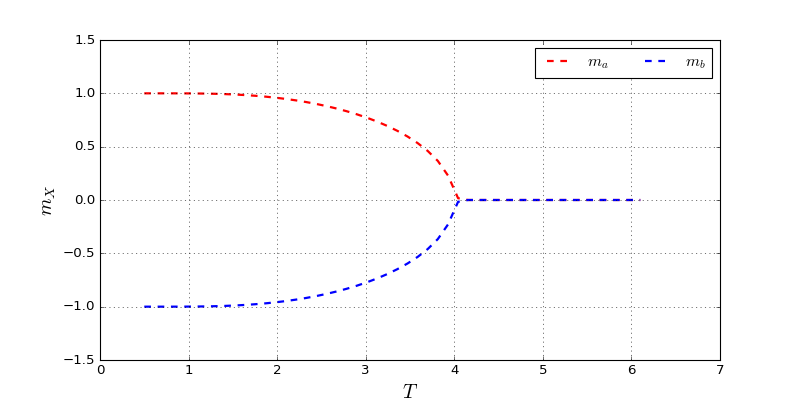

In [295]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.set_xlabel('$T$', fontsize=18, fontweight='bold')
ax.set_ylabel('$m_X$', fontsize=18, fontweight='bold')
ax.set_ylim([-1.5,1.5])

plt.plot([i[2] for i in result_SC], [i[0] for i in result_SC], color='red', label="$m_a$", linestyle='--', linewidth=2.0)
plt.plot([i[2] for i in result_SC], [i[1] for i in result_SC], color='blue', label="$m_b$", linestyle='--', linewidth=2.0)

plt.legend(ncol = 2)

plt.grid(True)
plt.show()

## Free Energy Landscape

In [314]:
def Free_Energy_SC(m,T):
    m_a = m[0]
    m_b = m[1]
    return(-2.0*m_a*m_b - 0.5*(1.0/T)*np.log(4.0*np.cosh(m_a*4.0/T)*np.cosh(m_b*4.0/T)) )

In [315]:
def Free_Energy_SC_Lineplot(m_a,T):
    m_b = -m_a
    return(-2.0*m_a*m_b - 0.5*(1.0/T)*np.log(4.0*np.cosh(m_a*4.0/T)*np.cosh(m_b*4.0/T)) )

<IPython.core.display.Javascript object>


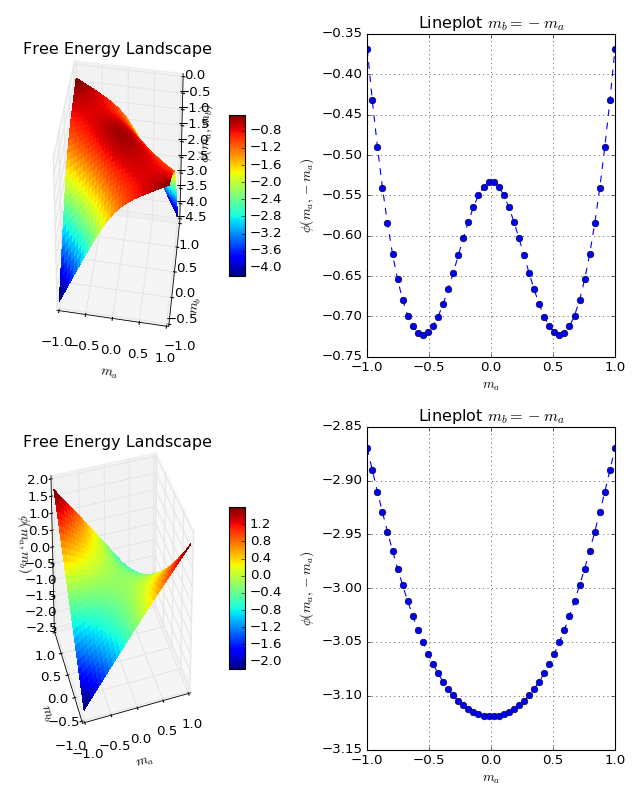

In [322]:
fig = plt.figure(num='Free Energy Landscape')

T = 1.3

ax = fig.add_subplot(2, 2, 1, projection='3d')

ax.set_title("Free Energy Landscape")
ax.set_xlabel("$m_a$")
ax.set_ylabel("$m_b$")
ax.set_zlabel("$\phi(m_a,m_b)$")

m_a = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_b = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_a, m_b = np.meshgrid(m_a, m_b)
FEL = Free_Energy_SC((m_a, m_b),T)

surface = ax.plot_surface(m_a, m_b, FEL, cmap=cm.jet, rstride=1, cstride=1,
                          linewidth=0, antialiased=False)

fig.colorbar(surface, shrink=0.5, aspect=10)

ax2 = fig.add_subplot(2, 2, 2)

ax2.set_title("Lineplot $m_b = -m_a $")
ax2.set_xlabel("$m_a$")
ax2.set_ylabel("$\phi(m_a,-m_a)$")
ax2.grid(True)

m_a = np.linspace(-1.0, 1.0, 50, endpoint=True)
FEL = Free_Energy_SC_Lineplot(m_a,T)

ax2.plot(m_a, FEL, 'bo--')

T = 4.0

ax = fig.add_subplot(2, 2, 3, projection='3d')

ax.set_title("Free Energy Landscape")
ax.set_xlabel("$m_a$")
ax.set_ylabel("$m_b$")
ax.set_zlabel("$\phi(m_a,m_b)$")

m_a = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_b = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_a, m_b = np.meshgrid(m_a, m_b)
FEL = Free_Energy_SC((m_a, m_b),T)

surface = ax.plot_surface(m_a, m_b, FEL, cmap=cm.jet, rstride=1, cstride=1,
                          linewidth=0, antialiased=False)

fig.colorbar(surface, shrink=0.5, aspect=10)

ax2 = fig.add_subplot(2, 2, 4)

ax2.set_title("Lineplot $m_b = -m_a $")
ax2.set_xlabel("$m_a$")
ax2.set_ylabel("$\phi(m_a,-m_a)$")
ax2.grid(True)

m_a = np.linspace(-1.0, 1.0, 50, endpoint=True)
FEL = Free_Energy_SC_Lineplot(m_a,T)

ax2.plot(m_a, LF, 'bo--')

plt.tight_layout()

plt.show()

## Variational Procedure

### Landau Functional

In [4]:
def Landau_Functional(m, T):
    m_a = m[0]
    m_b = m[1]
    return (T/2.0)*(-np.log(4.0*np.cosh(m_a*4.0/T)*np.cosh(m_b*4.0/T))\
                    +(4.0/T)*np.tanh(m_a*4.0/T)*np.tanh(m_b*4.0/T)\
                    +(4.0/T)*(m_a*np.tanh(m_a*4.0/T) + m_b*np.tanh(m_b*4.0/T)))

In [5]:
def Landau_Functional_Lineplot(m_a, T):
    m_b = -m_a
    return (T/2.0)*(-np.log(4.0*np.cosh(m_a*4.0/T)*np.cosh(m_b*4.0/T))\
                    +(4.0/T)*np.tanh(m_a*4.0/T)*np.tanh(m_b*4.0/T)\
                    +(4.0/T)*(m_a*np.tanh(m_a*4.0/T) + m_b*np.tanh(m_b*4.0/T)))

<IPython.core.display.Javascript object>


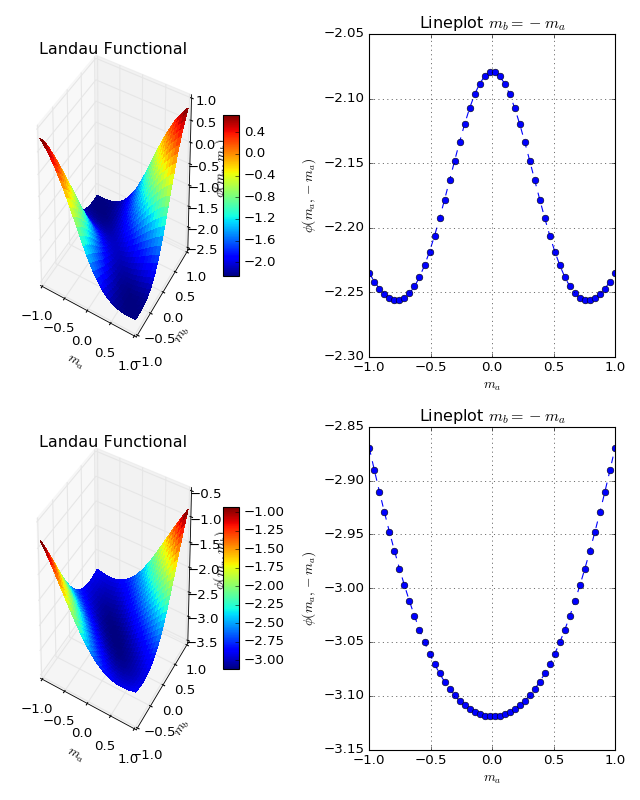

In [262]:
fig = plt.figure(num='Landau Functional')

T = 3.0

ax = fig.add_subplot(2, 2, 1, projection='3d')

ax.set_title("Landau Functional")
ax.set_xlabel("$m_a$")
ax.set_ylabel("$m_b$")
ax.set_zlabel("$\phi(m_a,m_b)$")

m_a = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_b = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_a, m_b = np.meshgrid(m_a, m_b)
LF = Landau_Functional((m_a, m_b),T)

surface = ax.plot_surface(m_a, m_b, LF, cmap=cm.jet, rstride=1, cstride=1,
                          linewidth=0, antialiased=False)

fig.colorbar(surface, shrink=0.5, aspect=10)

ax2 = fig.add_subplot(2, 2, 2)

ax2.set_title("Lineplot $m_b = -m_a $")
ax2.set_xlabel("$m_a$")
ax2.set_ylabel("$\phi(m_a,-m_a)$")
ax2.grid(True)

m_a = np.linspace(-1.0, 1.0, 50, endpoint=True)
LF = Landau_Functional_Lineplot(m_a,T)

ax2.plot(m_a, LF, 'bo--')

T = 4.5

ax = fig.add_subplot(2, 2, 3, projection='3d')

ax.set_title("Landau Functional")
ax.set_xlabel("$m_a$")
ax.set_ylabel("$m_b$")
ax.set_zlabel("$\phi(m_a,m_b)$")

m_a = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_b = np.linspace(-1.0, 1.0, 30, endpoint=True)
m_a, m_b = np.meshgrid(m_a, m_b)
LF = Landau_Functional((m_a, m_b),T)

surface = ax.plot_surface(m_a, m_b, LF, cmap=cm.jet, rstride=1, cstride=1,
                          linewidth=0, antialiased=False)

fig.colorbar(surface, shrink=0.5, aspect=10)

ax2 = fig.add_subplot(2, 2, 4)

ax2.set_title("Lineplot $m_b = -m_a $")
ax2.set_xlabel("$m_a$")
ax2.set_ylabel("$\phi(m_a,-m_a)$")
ax2.grid(True)

m_a = np.linspace(-1.0, 1.0, 50, endpoint=True)
LF = Landau_Functional_Lineplot(m_a,T)

ax2.plot(m_a, LF, 'bo--')

plt.tight_layout()

plt.show()

### Minimization

In [93]:
T_steps = np.linspace(0.5, 6.1, 50, endpoint=True)
result = np.zeros((1,4))
m = [0.0,0.0]

for T_run in T_steps:
    res = minimize(Landau_Functional, m, args=(T_run),\
                             method='Nelder-Mead', tol=1e-8,\
                             callback=None, options={'disp': False,\
                                                     'maxiter': None,\
                                                     'return_all': False,\
                                                     'maxfev': None,\
                                                     'xtol': 0.0001,\
                                                     'ftol': 0.0001})
#    print(res.x)
#    print(res.fun)
    temp = np.concatenate((res.x,[res.fun]), axis=0)
    temp = np.concatenate((temp,[T_run]), axis=0)
    result = np.vstack([result,temp])

result = np.delete(result, 0, 0)

<IPython.core.display.Javascript object>


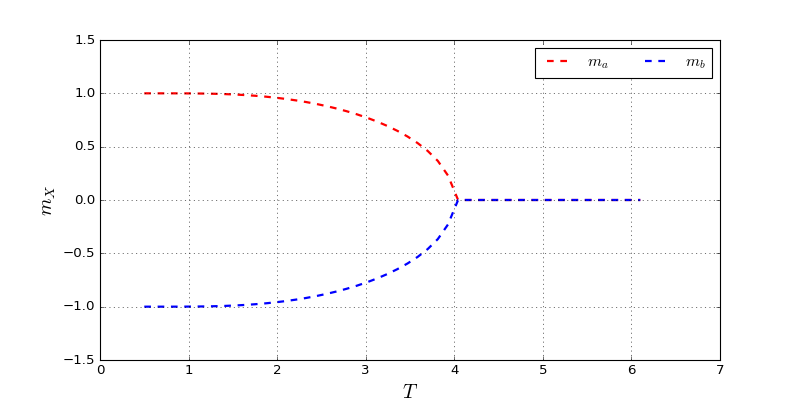

In [272]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.set_xlabel('$T$', fontsize=18, fontweight='bold')
ax.set_ylabel('$m_X$', fontsize=18, fontweight='bold')

plt.plot([i[3] for i in result], [i[0] for i in result], color='red', label="$m_a$", linestyle='--', linewidth=2.0)
plt.plot([i[3] for i in result], [i[1] for i in result], color='blue', label="$m_b$", linestyle='--', linewidth=2.0)

plt.legend(ncol = 2)

plt.grid(True)
plt.show()

In [ ]:
fig, axs = plt.subplots(2,3)

m = np.linspace(-1.0, 1.0, 30, endpoint=True)
q = np.linspace(0.0, 2.0, 30, endpoint=True)
m, q = np.meshgrid(m, q)

axs[0][0].set_title("$U = 1.0$, $\mu = 0.0$")
axs[0][0].set_xlabel("$m_{AFM}$")
axs[0][0].set_ylabel("$q$")

Z = F_afm(q, m, t, 1.0, 0.0)
levels = np.linspace(-2.0, -1.5, 100)

cs = axs[0][0].contourf(m, q, Z, levels=levels, cmap=cm.jet)
fig.colorbar(cs, ax=axs[0][0], format="%.2f")

axs[0][1].set_title("$U = 5.0$, $\mu = 0.0$")

Z = F_afm(q, m, t, 5.0, 0.0)
levels = np.linspace(-4, -1.5, 100)

cs = axs[0][1].contourf(m, q, Z, levels=levels, cmap=cm.jet)
fig.colorbar(cs, ax=axs[0][1], format="%.2f")

axs[0][2].set_title("$U = 10.0$, $\mu = 0.0$")

Z = F_afm(q, m, t, 10.0, 0.0)
levels = np.linspace(-7.5, -1.5, 100)

cs = axs[0][2].contourf(m, q, Z, levels=levels, cmap=cm.jet)
fig.colorbar(cs, ax=axs[0][2], format="%.2f")

axs[1][0].set_title("$U = 10.0$, $\mu = 5.0$")

Z = F_afm(q, m, t, 10.0, 5.0)
levels = np.linspace(-12.5, -2.5, 100)

cs = axs[1][0].contourf(m, q, Z, levels=levels, cmap=cm.jet)
fig.colorbar(cs, ax=axs[1][0], format="%.2f")

axs[1][1].set_title("$U = 10.0$, $\mu = 3.0$")

Z = F_afm(q, m, t, 10.0, 3.0)
levels = np.linspace(-10.5, -2.0, 100)

cs = axs[1][1].contourf(m, q, Z, levels=levels, cmap=cm.jet)
fig.colorbar(cs, ax=axs[1][1], format="%.2f")

axs[1][2].set_title("$U = 10.0$, $\mu = 1.0$")

Z = F_afm(q, m, t, 10.0, 1.0)
levels = np.linspace(-10.0, -1.5, 100)

cs = axs[1][2].contourf(m, q, Z, levels=levels, cmap=cm.jet)
fig.colorbar(cs, ax=axs[1][2], format="%.2f")

plt.tight_layout()
plt.show()

## Saddle Point Search

Maximize F with respect to q for fixed m and then fix q at found max. and minimize F with respect to m.
Repeat until convergence

In [ ]:
def F_afm_max_for_q(q, m, t, U, mu):
    return -F_afm(q, m, t, U, mu)
def F_afm_min_for_m(m, q, t, U, mu):
    return F_afm(q, m, t, U, mu)

def F_fm_max_for_q(q, m, t, U, mu):
    return -F_fm(q, m, t, U, mu)
def F_fm_min_for_m(m, q, t, U, mu):
    return F_fm(q, m, t, U, mu)

def F_pm_max_for_q(q, t, U, mu):
    return -F_pm(q, t, U, mu)

In [ ]:
mu_array = np.linspace(-4.0, 4.0, 81, endpoint=True)
result_afm = np.zeros((0,4))
result_fm = np.zeros((0,4))
result_pm = np.zeros((0,3))
m_global_guess = 1.0
q_global_guess = 1.0

In [ ]:
def free_energy_afm(mu, t, U):
    global result_afm
    global m_global_guess
    global q_global_guess
    
    m_old = 2.0
    m_new = m_global_guess

    q_old = 8.0
    q_new = q_global_guess

    eps = 1e-2

    max_run = 10
    i = 0
    
    old_mag_arr = np.zeros(2)
    
    print("WhileLoop:", sep=' ', end ="\n", flush=True)
    
    no_saddle_point = False
    
    while i < max_run and (np.fabs(m_old - m_new) > eps or np.fabs(q_old - q_new) > eps):
        
        i = i + 1
        print(i, sep=' ', end =" ", flush=True)

        print(q_new, sep=' ', end = " ", flush=True)
        print(m_new, sep=' ', end = " ", flush=True)
        
        q_old = q_new
        result_max_for_q = minimize(F_afm_max_for_q, 1.0, args=(m_new, t, U, mu), method='trust-ncg', tol=1e-8)
        q_new = result_max_for_q.x
        print(q_new, sep=' ', end = " ", flush=True)
        
        m_old = m_new
        result_min_for_m = minimize(F_afm_min_for_m, 1.0, args=(q_new, t, U, mu), method='trust-ncg', tol=1e-8)
        m_new = result_min_for_m.x
        print(m_new, sep=' ', end = " ", flush=True)
        
        if (np.fabs(m_new-old_mag_arr[1]) < 1e-5) and np.fabs(m_new - old_mag_arr[0]) > 0.5:
            m_new = 0.5*(old_mag_arr[0] + old_mag_arr[1]) 
            print('\n found 2 loop', m_new)
            #no_saddle_point = True
            #break
    
        old_mag_arr[1] = old_mag_arr[0]
        old_mag_arr[0] = m_new
        
        print( F_afm(q_new, m_new, t, U, mu), end = "\n", flush=True)

    if(not no_saddle_point):
        F = F_afm(q_new, m_new, t, U, mu)
        m_global_guess = m_new
        q_global_guess = q_new
        result_afm = np.vstack([result_afm,[mu,q_new,m_new,F]])
    else:
        F = 0
        q_new = 0
        m_new = 0
        result_afm = np.vstack([result_afm,[mu,q_new,m_new,F]])
    
    print("\nMu: {0:3.3f}, q: {1:3.3f}, m: {2:3.3f}, F: {3:3.3f}\n\n".format(mu, q_new, m_new, F))
    return(F)

def free_energy_fm(mu, t, U):
    global result_fm
    global m_global_guess
    global q_global_guess
    
    m_old = 2.0
    m_new = m_global_guess

    q_old = 8.0
    q_new = q_global_guess

    eps = 1e-2

    max_run = 10
    i = 0
    
    old_mag_arr = np.zeros(2)

    print("WhileLoop:", sep=' ', end ="\n", flush=True)
    
    no_saddle_point = False
    
    while i < max_run and (np.fabs(m_old - m_new) > eps or np.fabs(q_old - q_new) > eps):
        
        i = i + 1
        print(i, sep=' ', end =" ", flush=True)
        
        print(q_new, sep=' ', end = " ", flush=True)
        print(m_new, sep=' ', end = " ", flush=True)
    
        q_old = q_new

        result_max_for_q = minimize_scalar(F_fm_max_for_q, bracket=(0.0, 2.0), args=(m_new, t, U, mu), method='brent', options={'xtol': 1e-8})
        q_new = result_max_for_q.x
        print(q_new, sep=' ', end = " ", flush=True)
        
        m_old = m_new

        result_min_for_m = minimize_scalar(F_fm_min_for_m, bracket=(-1.0, 1.0), args=(q_new, t, U, mu), method='brent', options={'xtol': 1e-8})
        m_new = result_min_for_m.x
        print(m_new, sep=' ', end = " ", flush=True)
        
        if (np.fabs(m_new-old_mag_arr[1]) < 1e-5) and np.fabs(m_new - old_mag_arr[0]) > 0.5:
            m_new = 0.8*(old_mag_arr[0] + old_mag_arr[1]) 
            print('\n found 2 loop', m_new)
            no_saddle_point = True
            break
    
        old_mag_arr[1] = old_mag_arr[0]
        old_mag_arr[0] = m_new
        
        print( F_fm(q_new, m_new, t, U, mu), end = "\n", flush=True)

    if(not no_saddle_point):
        F = F_fm(q_new, m_new, t, U, mu)
        m_global_guess = m_new
        q_global_guess = q_new
        result_fm = np.vstack([result_fm,[mu,q_new,m_new,F]])
    else:
        F = 0
        q_new = 0
        m_new = 0
        result_fm = np.vstack([result_fm,[mu,q_new,m_new,F]])
    
    print("\nMu: {0:3.3f}, q: {1:3.3f}, m: {2:3.3f}, F: {3:3.3f}\n\n".format(mu, q_new, m_new, F))
    return(F)

def free_energy_pm(mu, t, U):
    global result_pm
    
    result_max_for_q = minimize_scalar(F_pm_max_for_q, bracket=(0.0, 2.0), args=(t, U, mu), method='brent', options={'xtol': 1e-8})
    q_new = result_max_for_q.x
        
    F = F_pm(q_new, t, U, mu)
    print("Mu: {0:3.3f}, q: {1:3.3f}, F: {2:3.3f}\n".format(mu, q_new, F))
    result_pm = np.vstack([result_pm,[mu,q_new,F]])
    
    return(F)

In [ ]:
mu_array = np.linspace(-1.0, 1.0, 11, endpoint=True)
for mu in mu_array:
    free_energy_pm(mu, t, U)

In [ ]:
#teams_list = ["Mu", "q", "m", "F"]
#teams_list = ["Mu", "q", "F"]
#pandas.DataFrame(result_fm, mu_array, teams_list)
result_pm

### Derivatives

In [ ]:
deriv_afm = np.zeros(len(mu_array))
deriv_fm = np.zeros(len(mu_array))
deriv_pm = np.zeros(len(mu_array))

In [ ]:
for count, mu_run in enumerate(mu_array):
    deriv_pm[count] = derivative(free_energy_pm, mu_run, dx=1e-2, args=(t,U))

In [ ]:
result_afm = np.load('afm_Res2.npy')
result_fm = np.load('fm_Res2.npy')
result_pm = np.load('pm_Res2.npy')

deriv_afm = np.load('afm_diff2.npy')
deriv_fm = np.load('fm_diff2.npy')
deriv_pm = np.load('pm_diff2.npy')

In [ ]:
plt.figure()
plt.plot([i[0] for i in result_afm], [i[3] for i in result_afm], 'r-',\
         [i[0] for i in result_fm], [i[3] for i in result_fm], 'g-',\
         [i[0] for i in result_pm], [i[2] for i in result_pm], 'b-')
plt.show()

In [ ]:
mu_array = np.linspace(0.0, 5.0, 51, endpoint=True)
plt.figure()
#plt.plot(mu_array, -deriv_afm, 'r--')
plt.grid()
plt.plot(mu_array, -deriv_afm, 'r-',\
         mu_array, -deriv_fm, 'g-',\
         mu_array, -deriv_pm, 'b-')
plt.xlim([0.0,5.0])
plt.ylim([-0.5,1.0])
#plt.axis([0, 0.5, -0.5, 1.0])
plt.show()